In [508]:
import numpy as np

In [509]:
import matplotlib.pyplot as plt

In [510]:
import pandas as pd

In [511]:
loan = pd.read_csv("/home/santo/Documents/upgrad_PG/loan.csv", dtype={"next_pymnt_d" : str})
loan.shape
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [512]:

df = loan
df.columns
for col in df.columns :
    if df[col].isnull().sum() > 36000 :
        df = df.drop([col], axis=1)
df.isnull().sum()
df1 = df.dropna(how="all")

In [513]:
df1.isnull().sum(axis=0)
df1["int_rate"] = loan["int_rate"]
df1["int_rate"]

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [514]:
df1["collections_12_mths_ex_med"].value_counts()
df1=df1.drop(["collections_12_mths_ex_med"], axis=1)
df1.columns


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [515]:
df1["term"] = df1["term"].apply(lambda x : x.split()[0])
df1["int_rate"] = df1["int_rate"].apply(lambda x : x.removesuffix("%"))
df1["revol_util"] = df1["revol_util"].apply(lambda x : str(x).removesuffix("%"))



In [516]:
df1["int_rate"]

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: object

In [517]:
import seaborn as sns

In [518]:
 df_c = df1[df1["loan_status"] == "Charged Off"]
 df_p = df1[df1["loan_status"] == "Fully Paid"]


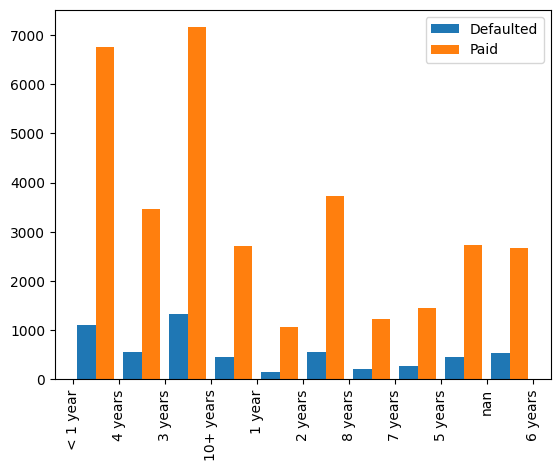

In [519]:
x = df_c["emp_length"].astype(str)
y = df_p["emp_length"].astype(str)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.xticks(o2, rotation=90)
plt.show()

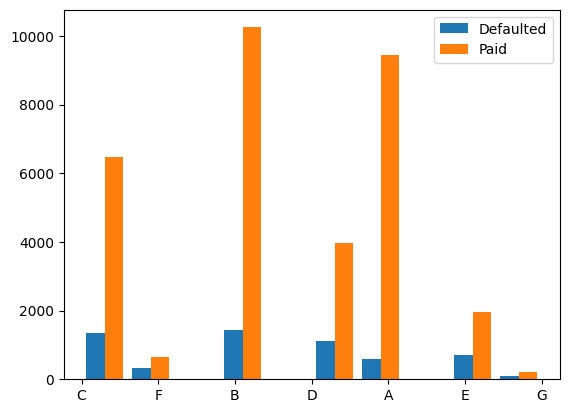

In [528]:
x = df_c["grade"].astype(str)
y = df_p["grade"].astype(str)
o1,o2,o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
#plt.xticks(o2, rotation=90)
plt.show()

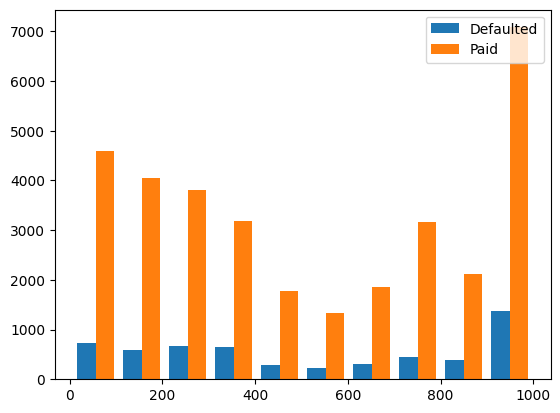

In [521]:


#x = df_c.loc[df_c["zip_code"].notna()]
#y = df_p.loc[df_c["zip_code"].notna()]
df_c.loc[:, ["zip_code"]] = df_c["zip_code"].apply(lambda x : x[:-2])
df_c.loc[:, ["zip_code"]] = df_c[df_c["zip_code"].notna()]

df_p.loc[:, ["zip_code"]] = df_p["zip_code"].apply(lambda x : x[:-2])
df_p.loc[:, ["zip_code"]] = df_p[df_p["zip_code"].notna()]



x = df_c["zip_code"].astype(int)
x = x.dropna()
y = df_p["zip_code"].astype(int)
y = y.dropna()

o1,o2,o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
#plt.xticks(o2, rotation=90)
plt.show()

In [522]:
df_c.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

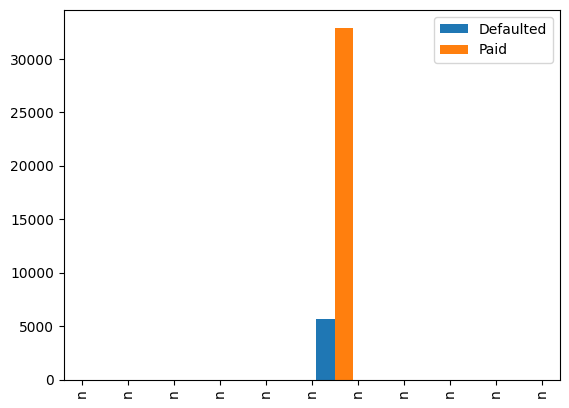

In [526]:
x = df_c["pymnt_plan"].astype(str)
y = df_p["pymnt_plan"].astype(str)
o1,o2,o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.xticks(o2, rotation=90)
plt.show()

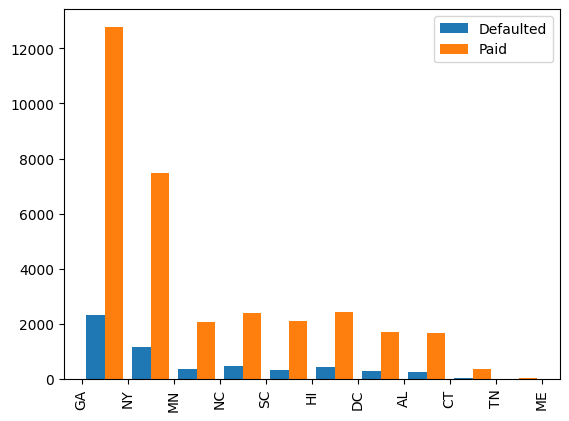

In [525]:
x = df_c["addr_state"].astype(str)
y = df_p["addr_state"].astype(str)
o1,o2,o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.xticks(o2, rotation=90)
plt.show()

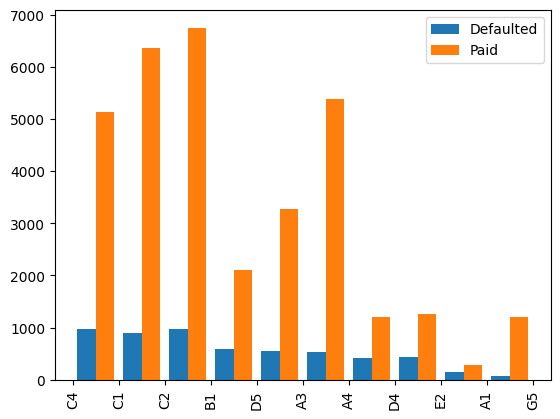

In [373]:
x = df_c["sub_grade"].astype(str)
y = df_p["sub_grade"].astype(str)
o1,o2,o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.xticks(o2, rotation=90)
plt.show()

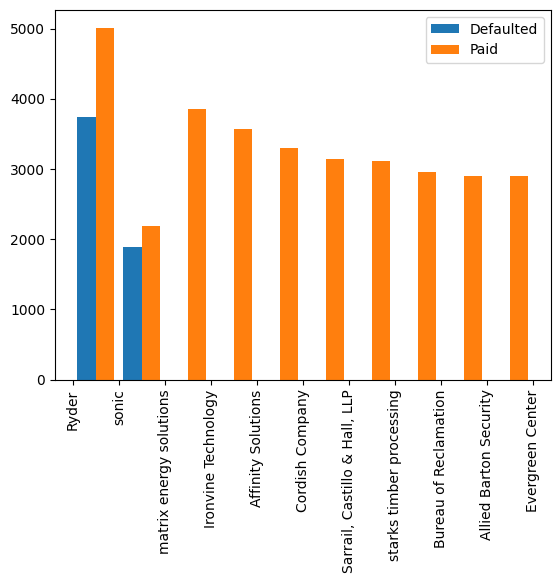

In [374]:
x = df_c["emp_title"].astype(str)
y = df_p["emp_title"].astype(str)
o1,o2,o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.xticks(o2, rotation=90)
plt.show()

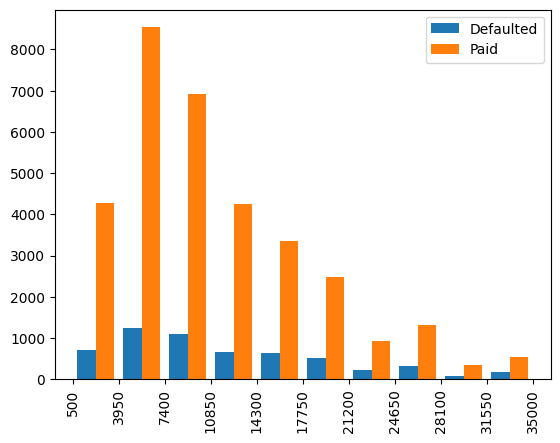

In [369]:
x = df_c["loan_amnt"].astype(int)
y = df_p["loan_amnt"].astype(int)
o1,o2,o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.xticks(o2, rotation=90)
plt.show()

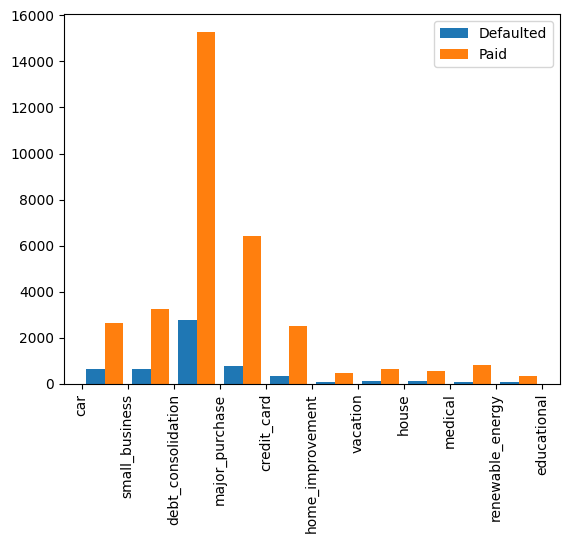

In [274]:
x = df_c["purpose"].astype(str)
y = df_p["purpose"].astype(str)
plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.xticks(o2, rotation=90)
plt.show()

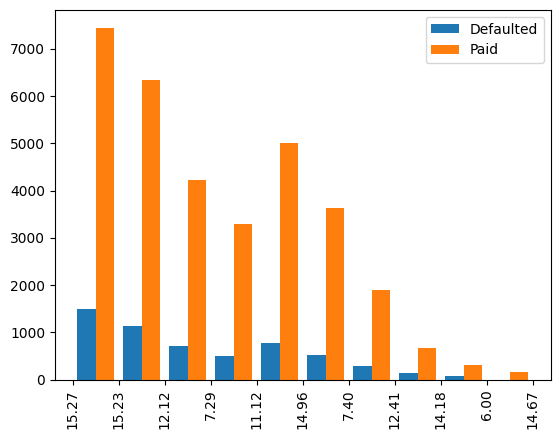

In [278]:
x = df_c["int_rate"].astype(str)
y = df_p["int_rate"].astype(str)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.xticks(o2, rotation=90)
plt.show()

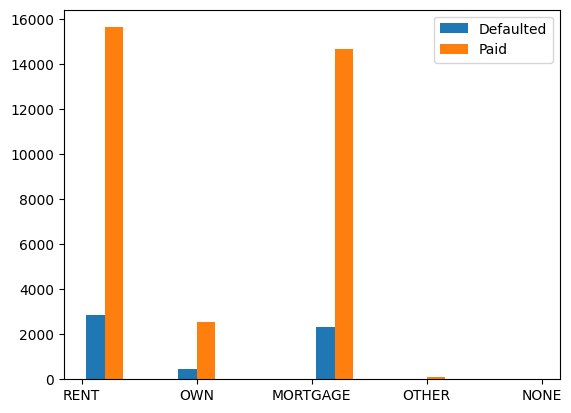

In [280]:
x = df_c["home_ownership"].astype(str)
y = df_p["home_ownership"].astype(str)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
#plt.xticks(o2, rotation=90)
plt.show()

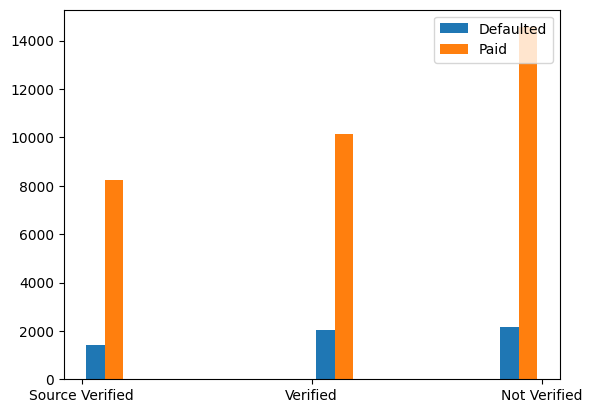

In [289]:
x = df_c["verification_status"].astype(str)
y = df_p["verification_status"].astype(str)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.show()

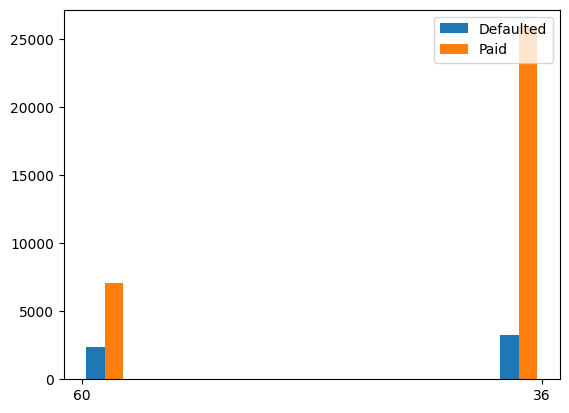

In [283]:
x = df_c["term"].astype(str)
y = df_p["term"].astype(str)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.show()

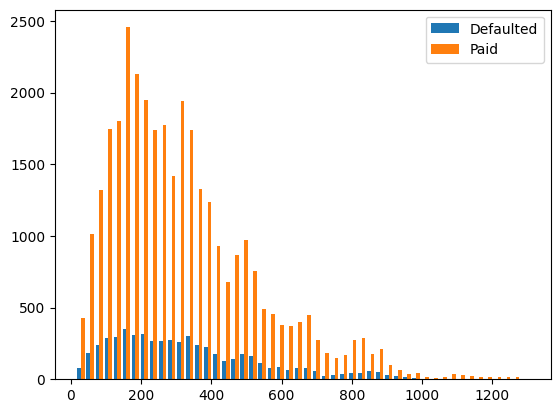

In [286]:
x = df_c["installment"].astype(float)
y = df_p["installment"].astype(float)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=50)
plt.legend(loc='upper right')
plt.show()

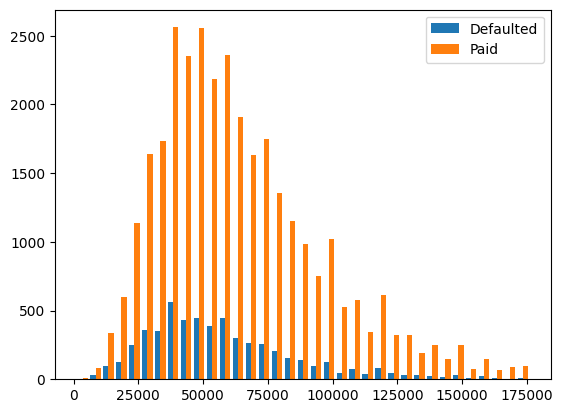

In [288]:
x = df_c["annual_inc"].astype(int)
y = df_p["annual_inc"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'],bins=np.arange(1000, 180000, 5000))
plt.legend(loc='upper right')
plt.show()

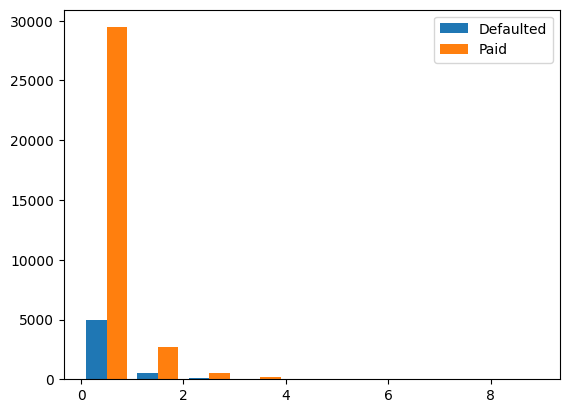

In [291]:
x = df_c["delinq_2yrs"].astype(int)
y = df_p["delinq_2yrs"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,10))
plt.legend(loc='upper right')
plt.show()

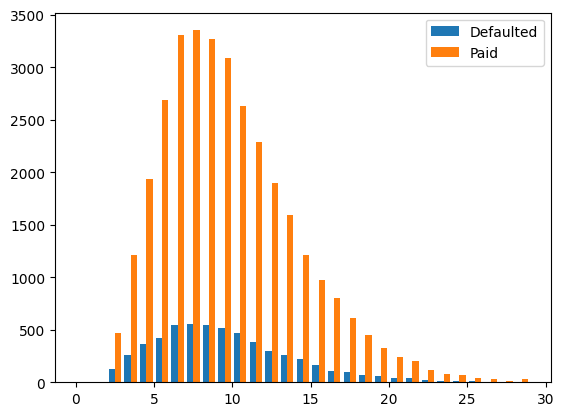

In [292]:

x = df_c["open_acc"].astype(int)
y = df_p["open_acc"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,30))
plt.legend(loc='upper right')
plt.show()

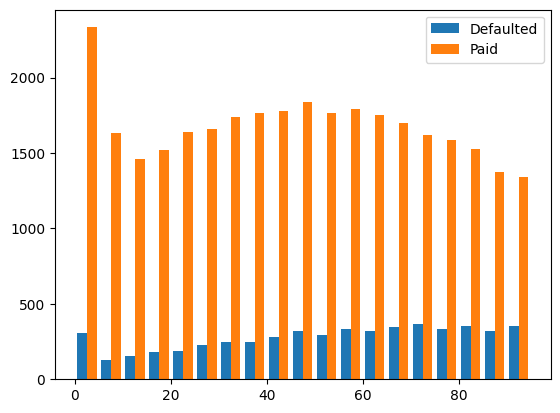

In [295]:
x = df_c["revol_util"].astype(float)
y = df_p["revol_util"].astype(float)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,100,5))
plt.legend(loc='upper right')
plt.show()

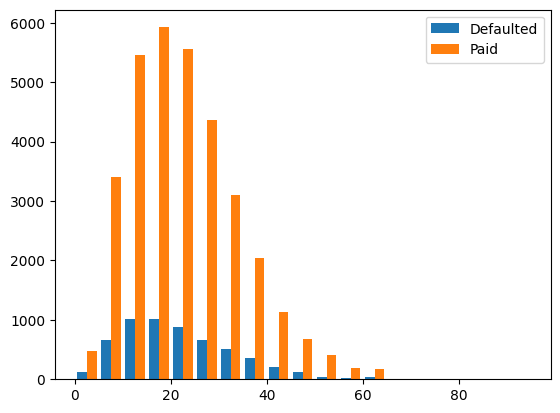

In [296]:
x = df_c["total_acc"].astype(float)
y = df_p["total_acc"].astype(float)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,100,5))
plt.legend(loc='upper right')
plt.show()

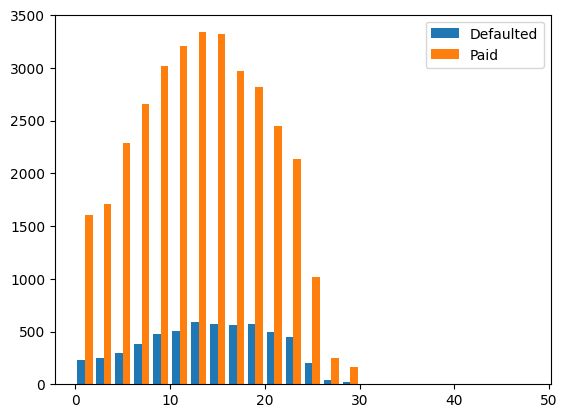

In [301]:

x = df_c["dti"].astype(float)
y = df_p["dti"].astype(float)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,50,2))
plt.legend(loc='upper right')
plt.show()

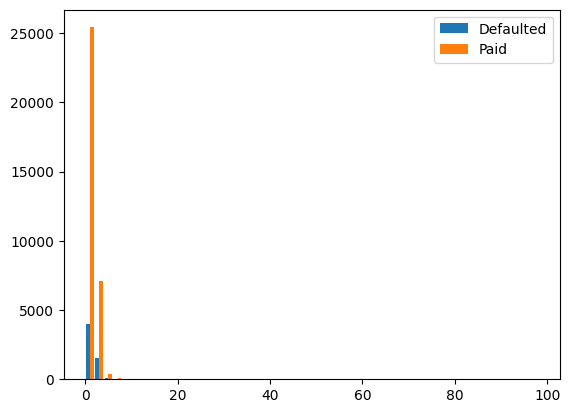

In [311]:
x = df_c["inq_last_6mths"]
y = df_p["inq_last_6mths"]
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,100,2))
plt.legend(loc='upper right')
plt.show()

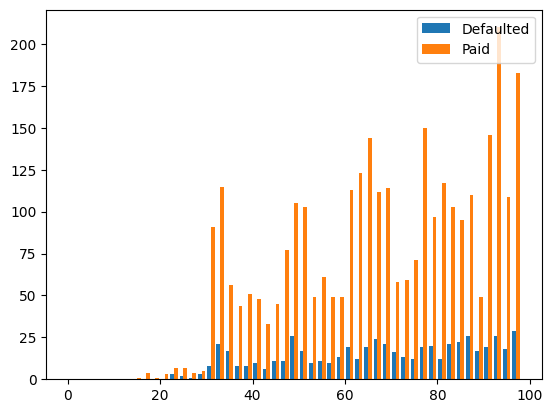

In [312]:

x = df_c["installment"]
y = df_p["installment"]
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,100,2))
plt.legend(loc='upper right')
plt.show()

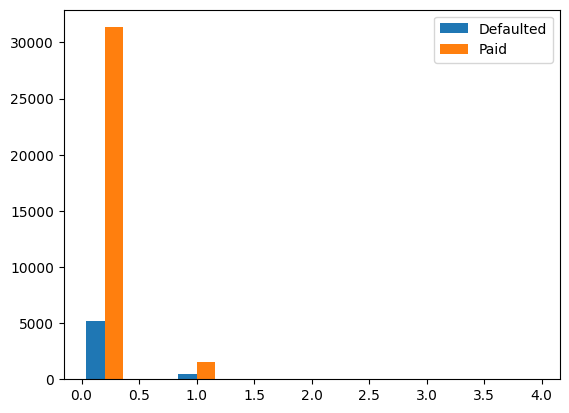

In [314]:

x = df_c["pub_rec"]
y = df_p["pub_rec"]
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.show()


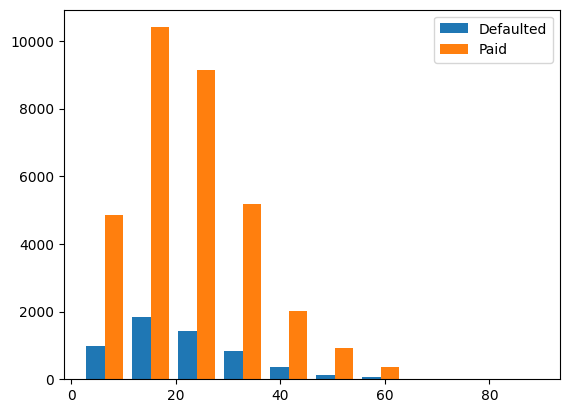

In [321]:

x = df_c["total_acc"].astype(int)
y = df_p["total_acc"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.show()


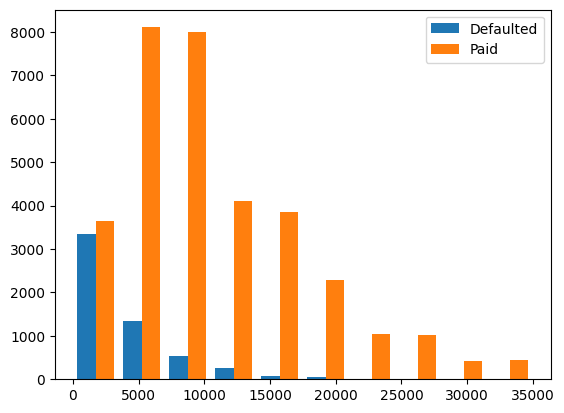

In [323]:

x = df_c["total_rec_prncp"].astype(int)
y = df_p["total_rec_prncp"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.show()


In [324]:
df1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'application_type', 'pub_rec_bankruptcies'],
      dtype='object')

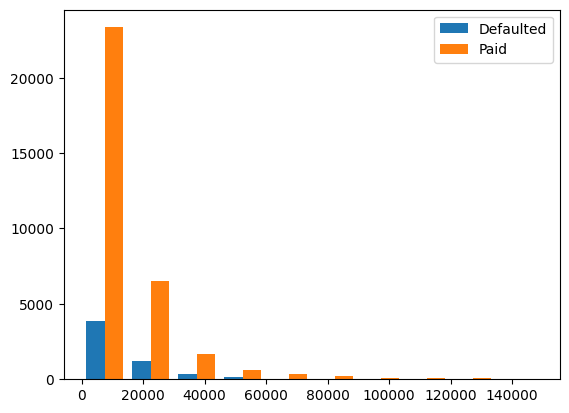

In [325]:

x = df_c["revol_bal"].astype(int)
y = df_p["revol_bal"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.show()


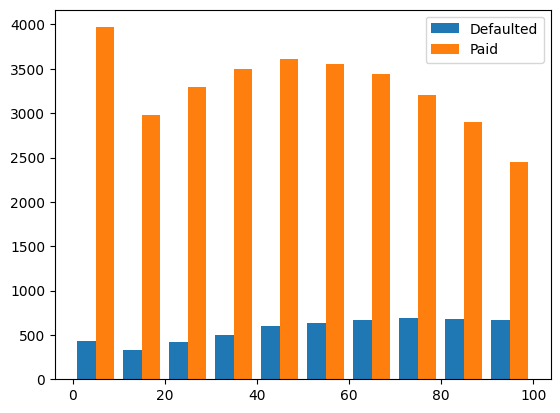

In [327]:

x = df_c["revol_util"].astype(float)
y = df_p["revol_util"].astype(float)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.show()


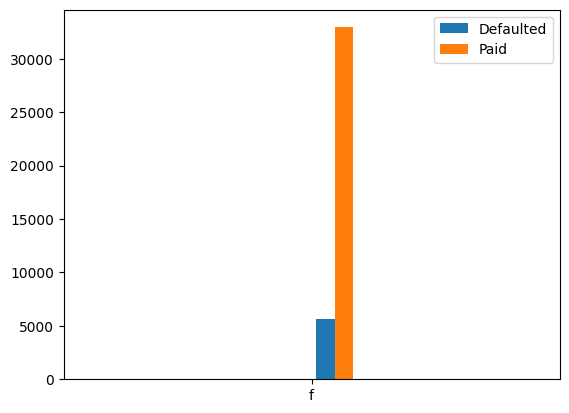

In [329]:

x = df_c["initial_list_status"].astype(str)
y = df_p["initial_list_status"].astype(str)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.show()


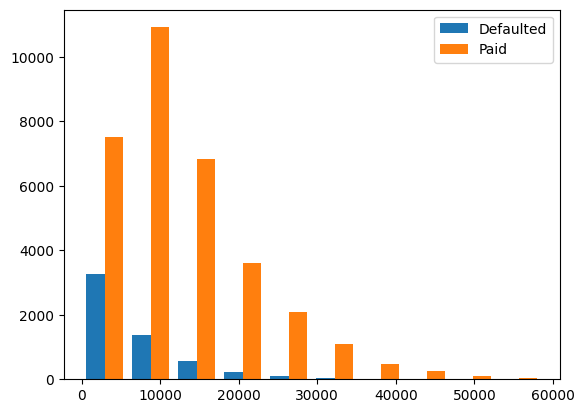

In [334]:

x = df_c["total_pymnt"].astype(int)
y = df_p["total_pymnt"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.show()


In [335]:
df1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'application_type', 'pub_rec_bankruptcies'],
      dtype='object')

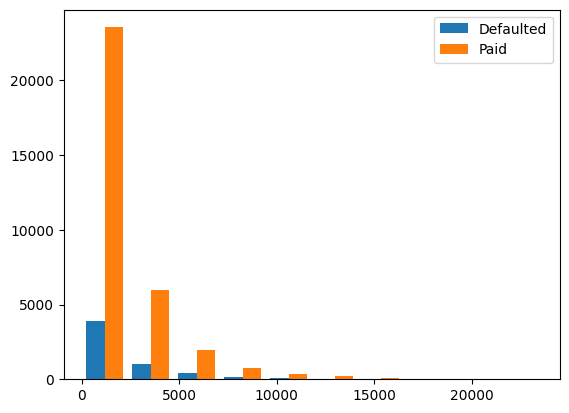

In [337]:

x = df_c["total_rec_int"].astype(int)
y = df_p["total_rec_int"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'])
plt.legend(loc='upper right')
plt.show()


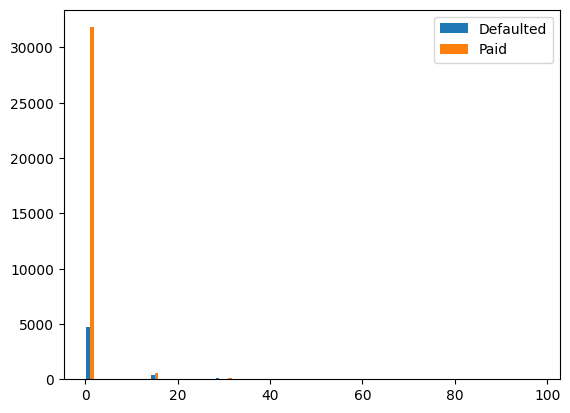

In [351]:

x = df_c["total_rec_late_fee"].astype(float)
y = df_p["total_rec_late_fee"].astype(float)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,100,2))
plt.legend(loc='upper right')
plt.show()


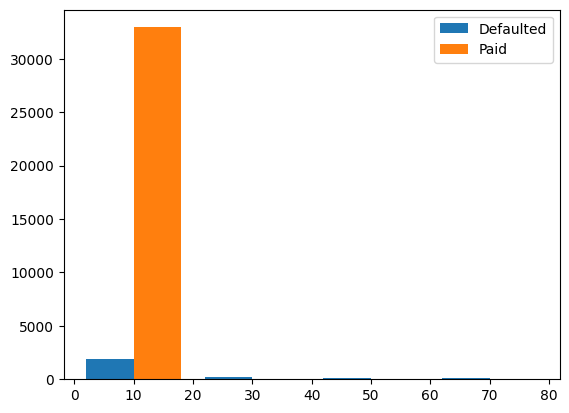

In [354]:

x = df_c["recoveries"].astype(int)
y = df_p["recoveries"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,100,20))
plt.legend(loc='upper right')
plt.show()


In [ ]:

x = df_c["collection_recovery_fee"].astype(int)
y = df_p["collection_recovery_fee"].astype(int)
o1, o2, o3 = plt.hist([x, y], label=['Defaulted', 'Paid'], bins=np.arange(0,100,10))
#plt.xticks(range(len(x.columns)),rotation=100)

plt.legend(loc='upper right')
plt.show()


<Axes: xlabel='loan_status', ylabel='total_pymnt_inv'>

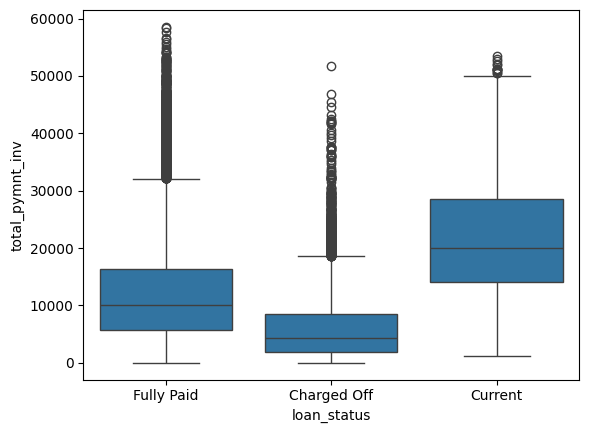

In [232]:
#df1["chargeoff_within_12_mths"].value_counts()
#df1 = df1.drop(columns=["chargeoff_within_12_mths"])
df1["total_rec_prncp"].value_counts()
sns.boxplot(x=df1["loan_status"],y=df1["total_pymnt_inv"].astype(float))
#plt.scatter(df1["chargeoff_within_12_mths"], df1["loan_status"])

<Axes: xlabel='loan_status', ylabel='total_pymnt'>

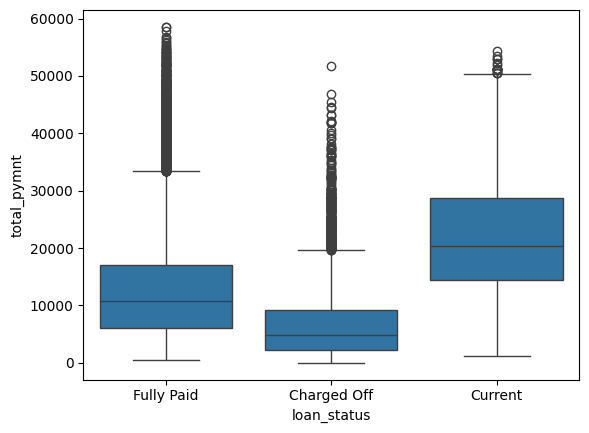

In [233]:
#df1["chargeoff_within_12_mths"].value_counts()
#df1 = df1.drop(columns=["chargeoff_within_12_mths"])
df1["total_rec_prncp"].value_counts()
sns.boxplot(x=df1["loan_status"],y=df1["total_pymnt"].astype(float))
#plt.scatter(df1["chargeoff_within_12_mths"], df1["loan_status"])

<Axes: xlabel='loan_status', ylabel='total_rec_int'>

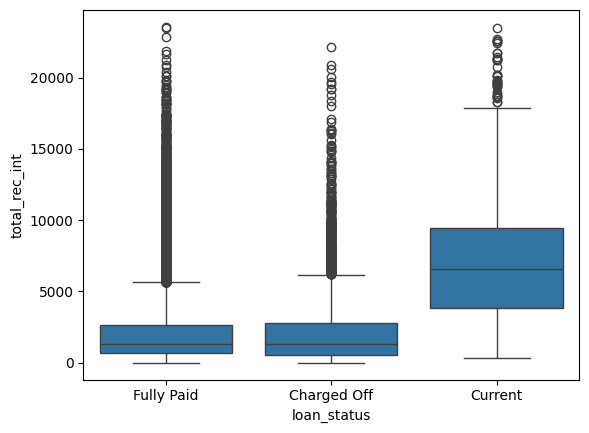

In [231]:
#df1["chargeoff_within_12_mths"].value_counts()
#df1 = df1.drop(columns=["chargeoff_within_12_mths"])
df1["total_rec_prncp"].value_counts()
sns.boxplot(x=df1["loan_status"],y=df1["total_rec_int"].astype(float))
#plt.scatter(df1["chargeoff_within_12_mths"], df1["loan_status"])

<Axes: xlabel='loan_status', ylabel='out_prncp'>

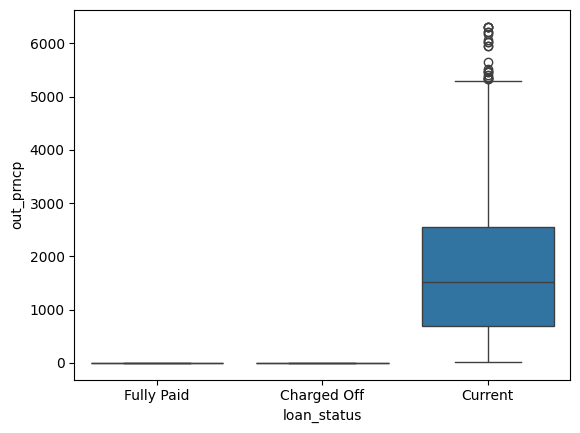

In [234]:
#df1["chargeoff_within_12_mths"].value_counts()
#df1 = df1.drop(columns=["chargeoff_within_12_mths"])
df1["total_rec_prncp"].value_counts()
sns.boxplot(x=df1["loan_status"],y=df1["out_prncp"].astype(float))
#plt.scatter(df1["chargeoff_within_12_mths"], df1["loan_status"])

<Axes: xlabel='loan_status', ylabel='total_rec_prncp'>

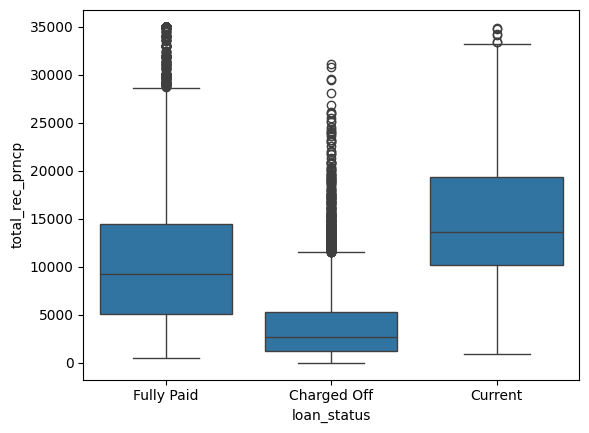

In [235]:
#df1["chargeoff_within_12_mths"].value_counts()
#df1 = df1.drop(columns=["chargeoff_within_12_mths"])
df1["total_rec_prncp"].value_counts()
sns.boxplot(x=df1["loan_status"],y=df1["total_rec_prncp"].astype(float))
#plt.scatter(df1["chargeoff_within_12_mths"], df1["loan_status"])

In [240]:
df1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

<Axes: xlabel='loan_status', ylabel='last_pymnt_amnt'>

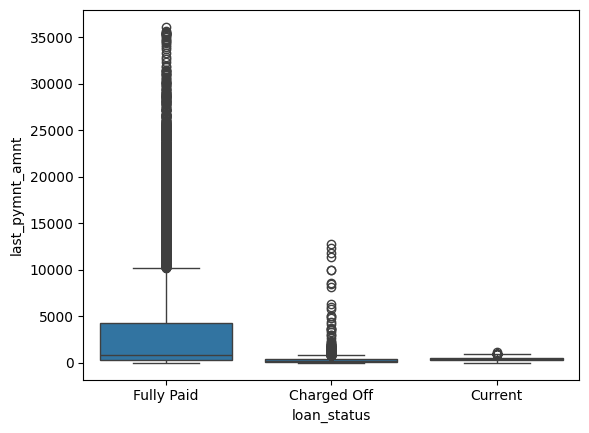

In [241]:
#df1["chargeoff_within_12_mths"].value_counts()
#df1 = df1.drop(columns=["chargeoff_within_12_mths"])
df1["total_rec_prncp"].value_counts()
sns.boxplot(x=df1["loan_status"],y=df1["last_pymnt_amnt"].astype(float))
#plt.scatter(df1["chargeoff_within_12_mths"], df1["loan_status"])

In [254]:
#df1["total_rec_late_fee"].value_counts()
df1 = df1.drop(columns=["acc_now_delinq", "delinq_amnt", "tax_liens", "policy_code", ])

<Axes: xlabel='loan_status', ylabel='total_rec_late_fee'>

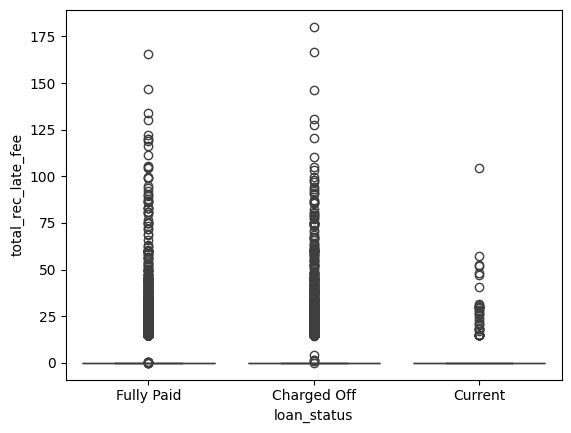

In [256]:
#df1["chargeoff_within_12_mths"].value_counts()
#df1 = df1.drop(columns=["chargeoff_within_12_mths"])
df1["total_rec_prncp"].value_counts()
sns.boxplot(x=df1["loan_status"],y=df1["total_rec_late_fee"].astype(float))
#plt.scatter(df1["chargeoff_within_12_mths"], df1["loan_status"])

In [259]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

<Axes: xlabel='loan_status', ylabel='total_rec_late_fee'>

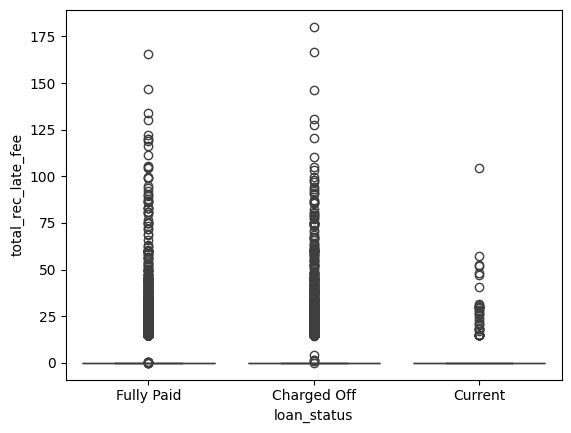

In [256]:
#df1["chargeoff_within_12_mths"].value_counts()
#df1 = df1.drop(columns=["chargeoff_within_12_mths"])
df1["total_rec_prncp"].value_counts()
sns.boxplot(x=df1["loan_status"],y=df1["total_rec_late_fee"].astype(float))
#plt.scatter(df1["chargeoff_within_12_mths"], df1["loan_status"])